In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving DATASET.csv to DATASET.csv


In [ ]:
import re #import regular expression
import string 
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer

englishStemmer = SnowballStemmer('english')
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

import math

import numpy as np

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from sklearn.metrics import accuracy_score
import pandas as pd
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from IPython.display import display
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob

In [ ]:
df = pd.read_csv('DATASET.csv',encoding='ISO-8859-1')
df.head()

,content,sentiment
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def remove_stopwords(text):
    stopWords = stopwords.words('english')
    not_stopword = [word for word in text if not word in stopWords]
    return not_stopword

def clean_str(string):

  string = str(string).lower()

  # define punctuation
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

  # remove punctuation from the string
  no_punct = ""
  for char in string:
    if char not in punctuations:
        no_punct = no_punct + char

  string = no_punct  


  string = re.sub(r"\r", "", string) 
  # string = re.sub(r"[0-9]", "digit", string)
  string = re.sub(r"\'", "", string)    
  string = re.sub(r"\"", "", string) 
  string = re.sub(r"\d+" , "", string)
  # remove html markup
  string = re.sub("(<.*?>)","", string)
    
  #remove non-ascii and digits
  string = re.sub("(\\W|\\d)"," ", string)

  string = string.strip() #white spaces

  string = re.sub(r"what's", "what is ", string)
  string = re.sub(r"\'s", " ", string)
  string = re.sub(r"\'ve", " have ", string)
  string = re.sub(r"can't", "can not ", string)
  string = re.sub(r"n't", " not ", string)
  string = re.sub(r"i'm", "i am ", string)
  string = re.sub(r"\'re", " are ", string)
  string = re.sub(r"\'d", " would ", string)
  string = re.sub(r"\'ll", " will ", string)
  string = re.sub(r"\'scuse", " excuse ", string)
    
  #remove non word

  string = re.sub('\W', ' ', string)

  #for one or more spaces

  string = re.sub('\s+', ' ', string)
  string = string.strip(' ')

  #string tokenization

  tokens_by_word = ''
  tokens_by_word = word_tokenize(string)

  string = tokens_by_word

  #remove stopwords
  result = remove_stopwords(string)
  string = result

  #stemming
  words = [word for word in string if word.isalpha()]
  stemmed = [englishStemmer.stem(word) for word in string]
  string = stemmed

  #lematization

  lemmatized = [wordnet_lemmatizer.lemmatize(word, pos="v") for word in string]
  
  string = ' '.join(lemmatized)


  #parts of speech tagging
  

#  string = TextBlob(string)

  return string

df['content'] = df['content'].map(lambda com : clean_str(com))
df['content']

0                                        didnt feel humili
1        go feel hopeless damn hope around someon care ...
2                     im grab minut post feel greedi wrong
3           ever feel nostalg fireplac know still properti
4                                             feel grouchi
                               ...                        
15995           brief time beanbag say anna feel like beat
15996     turn feel pathet still wait tabl sub teach degre
15997                              feel strong good overal
15998                       feel like rude comment im glad
15999                         know lot feel stupid portray
Name: content, Length: 16000, dtype: object

In [ ]:
col = ['sentiment', 'content']
df = df[col]
df = df[pd.notnull(df['content'])]

df.columns = ['sentiment', 'content']
df['clss'] = df['sentiment'].factorize()[0]

print(df['clss'])
category_id_df = df[['sentiment', 'clss']].drop_duplicates().sort_values('clss')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['clss', 'sentiment']].values)

0        0
1        0
2        1
3        2
4        1
        ..
15995    0
15996    0
15997    5
15998    1
15999    0
Name: clss, Length: 16000, dtype: int64


In [ ]:
tfidf1 = TfidfVectorizer(use_idf=False,sublinear_tf=True,min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features1 = tfidf1.fit_transform(df.content).toarray()
labels1 = df.clss
features1.shape

(16000, 14203)

In [ ]:
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features1, labels1 == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf1.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '0':
  . Most correlated unigrams:
. miser
. punish
  . Most correlated bigrams:
. feel sorri
. feel letharg


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '1':
  . Most correlated unigrams:
. honor
. content
  . Most correlated bigrams:
. feel honor
. feel content


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '2':
  . Most correlated unigrams:
. sympathet
. love
  . Most correlated bigrams:
. feel sympathet
. feel love


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '3':
  . Most correlated unigrams:
. greedi
. irrit
  . Most correlated bigrams:
. feel resent
. feel irrit


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# '4':
  . Most correlated unigrams:
. vulner
. terrifi
  . Most correlated bigrams:
. feel vulner
. feel insecur
# '5':
  . Most correlated unigrams:
. curious
. amaz
  . Most correlated bigrams:
. feel curious
. feel amaz


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


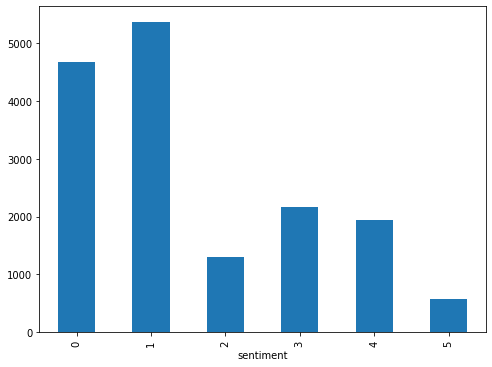

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('sentiment').content.count().plot.bar(ylim=0)
plt.show()

In [ ]:
#Prepare Model:

model1 = LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='saga',
          tol=0.0001, verbose=10, warm_start=False)

size_of_test_data = 0.30
num_of_RS = 42

X_train, X_test, y_train, y_test = train_test_split(df['content'], df['sentiment'],test_size = size_of_test_data ,random_state = num_of_RS)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer(sublinear_tf=True, norm='l2', use_idf=True, smooth_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
Logistic_Regression = model1.fit(X_train_tfidf, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


convergence after 87 epochs took 0 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


max_iter reached after 0 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.4s remaining:    0.0s


max_iter reached after 1 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s


max_iter reached after 0 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s


max_iter reached after 1 seconds


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    2.6s finished


In [ ]:
print(Logistic_Regression.predict(count_vect.transform(["I didnot feel humnuliated"])))

[1]


In [ ]:
print(Logistic_Regression.predict(count_vect.transform(["I need some chearing up"])))

[1]


In [ ]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features1, labels1, df.index, test_size = size_of_test_data, random_state = num_of_RS)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 39 epochs took 84 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


convergence after 36 epochs took 75 seconds


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.7min remaining:    0.0s


convergence after 37 epochs took 79 seconds


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.0min remaining:    0.0s


convergence after 35 epochs took 74 seconds


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.2min remaining:    0.0s


convergence after 36 epochs took 76 seconds


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.5min remaining:    0.0s


convergence after 40 epochs took 83 seconds


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.9min finished


confusion matrix of Logistic regression is: 


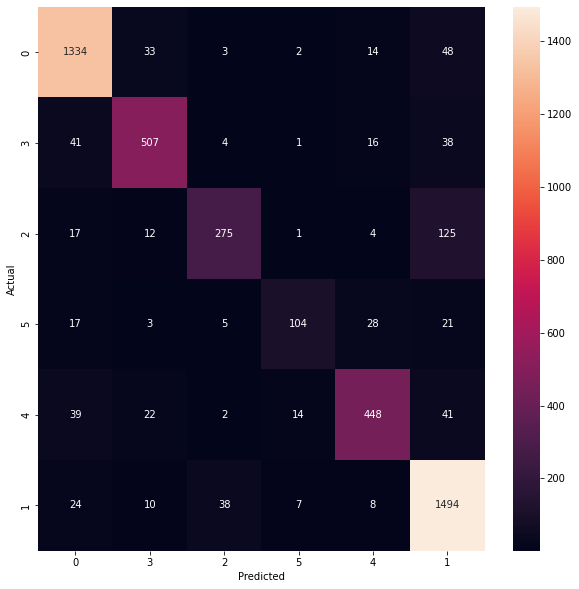

In [ ]:
model =  model1
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac1 = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.sentiment.values, yticklabels=category_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
print("confusion matrix of Logistic regression is: ")
plt.show()

In [ ]:
print("accuracy of Logistic Regression is: ",ac1)

accuracy of Logistic Regression is:  0.8670833333333333
